# Импорт необходимых библиотек

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [4]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [5]:
!pip install catboost
from catboost import CatBoostClassifier

# Анализ данных

In [8]:
# файлы импортируются с компьютера
creditcard = pd.read_csv('creditcard.csv')

In [9]:
creditcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
creditcard.shape

(284807, 31)

In [12]:
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

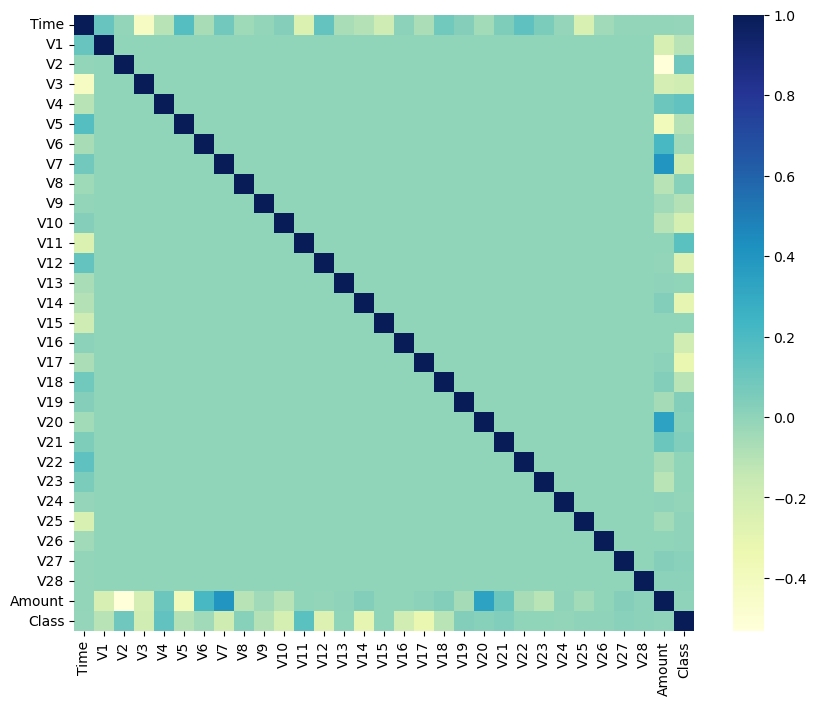

In [14]:
plt.figure(figsize=(10,8))
corr = creditcard.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [15]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.01:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

27
{'V5', 'V13', 'V14', 'V3', 'V19', 'V6', 'V2', 'V20', 'V23', 'V26', 'V10', 'V24', 'V8', 'V18', 'V22', 'Amount', 'V15', 'V21', 'Class', 'V4', 'V17', 'V1', 'V25', 'V11', 'V12', 'V7', 'V16'}


# Предобработка данных

In [16]:
X = creditcard.drop(columns=['Class'])
y = creditcard['Class']

In [17]:
os = SMOTE(random_state = 123, k_neighbors = 25)

column = X.columns
test = creditcard.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['Class'])

creditcard_os = pd.DataFrame(data = X_os, columns = test)

print(X_os.shape, y_os.shape)
y_os.value_counts()

(568630, 30) (568630, 1)


Class
0        284315
1        284315
dtype: int64

<Axes: >

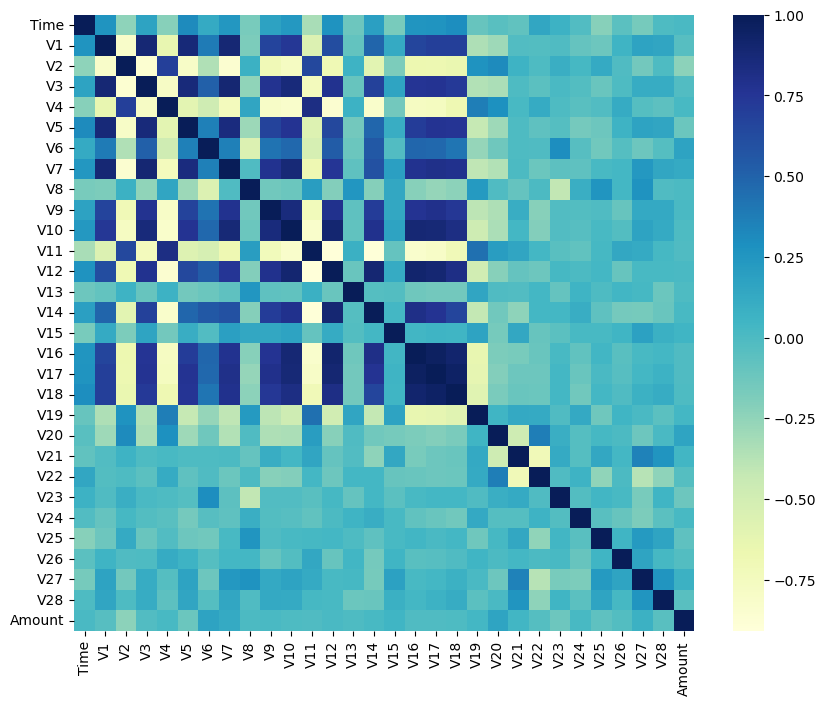

In [20]:
plt.figure(figsize=(10,8))
corr = X_os.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [18]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

14
{'V18', 'V7', 'V3', 'V12', 'V2', 'V10', 'V16', 'V17', 'V9', 'V5', 'V4', 'V11', 'V14', 'V22'}


In [19]:
X_os = X_os[list(correlated_features)]
X_os

,V18,V7,V3,V12,V2,V10,V16,V17,V9,V5,V4,V11,V14,V22
0,0.025791,0.239599,2.536347,-0.617801,-0.072781,0.090794,-0.470401,0.207971,0.363787,-0.338321,1.378155,-0.551600,-0.311169,0.277838
1,-0.183361,-0.078803,0.166480,1.065235,0.266151,-0.166974,0.463917,-0.114805,-0.255425,0.060018,0.448154,1.612727,-0.143772,-0.638672
2,-0.121359,0.791461,1.773209,0.066084,-1.340163,0.207643,-2.890083,1.109969,-1.514654,-0.503198,0.379780,0.624501,-0.165946,0.771679
3,1.965775,0.237609,1.792993,0.178228,-0.185226,-0.054952,-1.059647,-0.684093,-1.387024,-0.010309,-0.863291,-0.226487,-0.287924,0.005274
4,-0.038195,0.592941,1.548718,0.538196,0.877737,0.753074,-0.451449,-0.237033,0.817739,-0.407193,0.403034,-0.822843,-1.119670,0.798278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.599473,-1.388311,-3.207583,-2.832774,2.610742,-1.949727,-0.730311,0.709593,-2.709672,1.130779,5.307966,0.801464,-5.372057,-0.121587
568626,-4.034154,-9.869908,-7.383136,-7.056479,3.156097,-7.613315,-6.681150,-11.384292,-3.867216,-4.129239,5.023684,5.172280,-6.883882,1.253258
568627,-1.632431,-3.733022,-4.441795,-4.943861,1.650258,-4.907986,-3.003840,-7.099265,-2.898127,-0.442760,4.383815,3.467059,-7.423231,0.167449
568628,-7.756639,-12.345563,-11.528198,-13.402615,5.267711,-12.587549,-11.720289,-21.043556,-6.234464,-7.962640,7.728912,7.384305,-14.629153,0.144527


<Axes: >

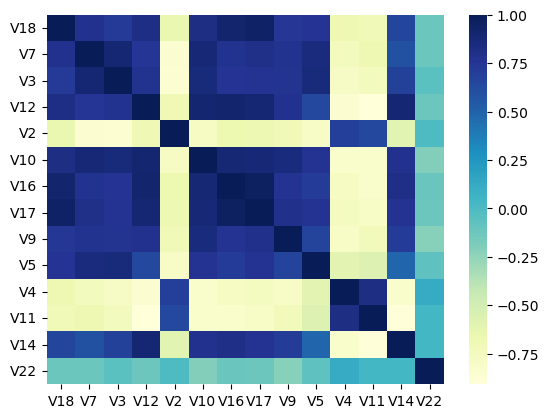

In [20]:
corr = X_os.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [21]:
%%time

X_os = pd.DataFrame(MinMaxScaler().fit_transform(X_os), columns = X_os.columns, index = X_os.index)

CPU times: user 47.9 ms, sys: 4.27 ms, total: 52.2 ms
Wall time: 51.2 ms


In [22]:
X_os

,V18,V7,V3,V12,V2,V10,V16,V17,V9,V5,V4,V11,V14,V22
0,0.655066,0.266815,0.881365,0.680908,0.766490,0.510600,0.434392,0.737173,0.475312,0.763439,0.313023,0.252484,0.635591,0.522992
1,0.640681,0.264875,0.840298,0.744342,0.770067,0.505267,0.464105,0.727794,0.453981,0.766120,0.271796,0.381188,0.641219,0.480237
2,0.644945,0.270177,0.868141,0.706683,0.753118,0.513018,0.357443,0.763381,0.410603,0.762329,0.268766,0.322422,0.640473,0.546030
3,0.788492,0.266803,0.868484,0.710910,0.765304,0.507585,0.415653,0.711253,0.414999,0.765647,0.213661,0.271817,0.636372,0.510277
4,0.650665,0.268968,0.864251,0.724477,0.776520,0.524303,0.434995,0.724243,0.490950,0.762975,0.269796,0.236355,0.608406,0.547271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.694522,0.256898,0.781831,0.597425,0.794806,0.468383,0.426127,0.751748,0.369436,0.773329,0.487228,0.332945,0.465426,0.504359
568626,0.375836,0.205227,0.709474,0.438233,0.800560,0.351205,0.236881,0.400348,0.329561,0.737918,0.474626,0.592859,0.414593,0.568495
568627,0.541019,0.242614,0.760444,0.517858,0.784671,0.407178,0.353825,0.524854,0.362945,0.762736,0.446261,0.491457,0.396458,0.517842
568628,0.119816,0.190145,0.637646,0.199046,0.822840,0.248290,0.076628,0.119689,0.248014,0.712112,0.594546,0.724399,0.154170,0.516773


<Axes: >

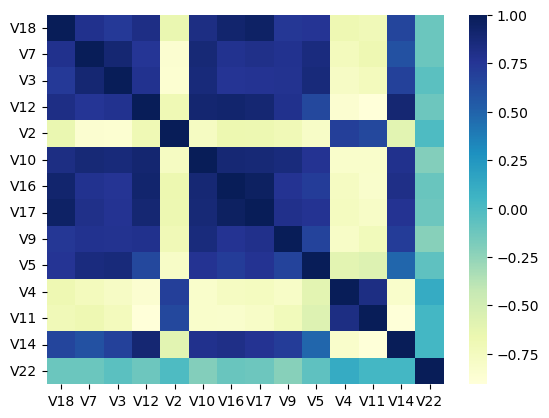

In [23]:
corr = X_os.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.35, random_state = 123)

# Обучение ML-моделей
### Логистическая регрессия

In [25]:
model_0 = LogisticRegression()
model_0.fit(X_train, y_train)
pred_0 = model_0.predict(X_test)

/home/egor/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/egor/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(accuracy_score(pred_0, y_test))
print(recall_score(pred_0, y_test))
print(precision_score(pred_0, y_test))

0.9732239311429447
0.9904850940064402
0.9557669369631241


### Дерево решений

In [31]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

In [32]:
print(accuracy_score(pred_1, y_test))
print(recall_score(pred_1, y_test))
print(precision_score(pred_1, y_test))

0.9949502816285719
0.9943339940336757
0.9955997474114687


### Случайный лес

In [ ]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

In [ ]:
print(accuracy_score(pred_2, y_test))
print(recall_score(pred_2, y_test))
print(precision_score(pred_2, y_test))

### CatBoost

In [52]:
model_3 = CatBoostClassifier(iterations=500, learning_rate=0.1)
model_3.fit(X_train, y_train)

0:	learn: 0.4819887	total: 32.5ms	remaining: 16.2s
1:	learn: 0.3379967	total: 63.9ms	remaining: 15.9s
2:	learn: 0.2524736	total: 96ms	remaining: 15.9s
3:	learn: 0.2011518	total: 126ms	remaining: 15.7s
4:	learn: 0.1662998	total: 153ms	remaining: 15.1s
5:	learn: 0.1427261	total: 182ms	remaining: 15s
6:	learn: 0.1272840	total: 212ms	remaining: 15s
7:	learn: 0.1148596	total: 246ms	remaining: 15.1s
8:	learn: 0.1048609	total: 278ms	remaining: 15.2s
9:	learn: 0.0970800	total: 315ms	remaining: 15.4s
10:	learn: 0.0918176	total: 347ms	remaining: 15.4s
11:	learn: 0.0876942	total: 376ms	remaining: 15.3s
12:	learn: 0.0845974	total: 405ms	remaining: 15.2s
13:	learn: 0.0803968	total: 437ms	remaining: 15.2s
14:	learn: 0.0777476	total: 467ms	remaining: 15.1s
15:	learn: 0.0757250	total: 500ms	remaining: 15.1s
16:	learn: 0.0734029	total: 539ms	remaining: 15.3s
17:	learn: 0.0716630	total: 568ms	remaining: 15.2s
18:	learn: 0.0694408	total: 598ms	remaining: 15.1s
19:	learn: 0.0678737	total: 623ms	remaining:

In [53]:
pred_3 = model_3.predict(X_test)

In [54]:
print(accuracy_score(pred_3, y_test))
print(recall_score(pred_3, y_test))
print(precision_score(pred_3, y_test))

0.9976987353093392
0.9980640954912483
0.997343811079816
